In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy.fft as fp

import matplotlib.image as mpimg
from PIL import Image
import scipy

%matplotlib inline

In [2]:
PAIR1_IMAGES = ['Image1.png', 'Image2.png']
# PAIR2_IMAGES = ['Image3.jpg', 'Image4.png']

In [6]:
# TODO: how to handle RGB images
# TODO: convert to float /255

img1 = cv2.imread(os.path.join('given-images', PAIR1_IMAGES[0]))
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
print(img1.shape)

# img2 = cv2.imread(os.path.join('given-images', PAIR1_IMAGES[1]))
# img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# img3 = cv2.imread(os.path.join('given-images', PAIR2_IMAGES[0]))
# img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# img4 = cv2.imread(os.path.join('given-images', PAIR2_IMAGES[1]))
# img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

(398, 363, 3)


# Testing

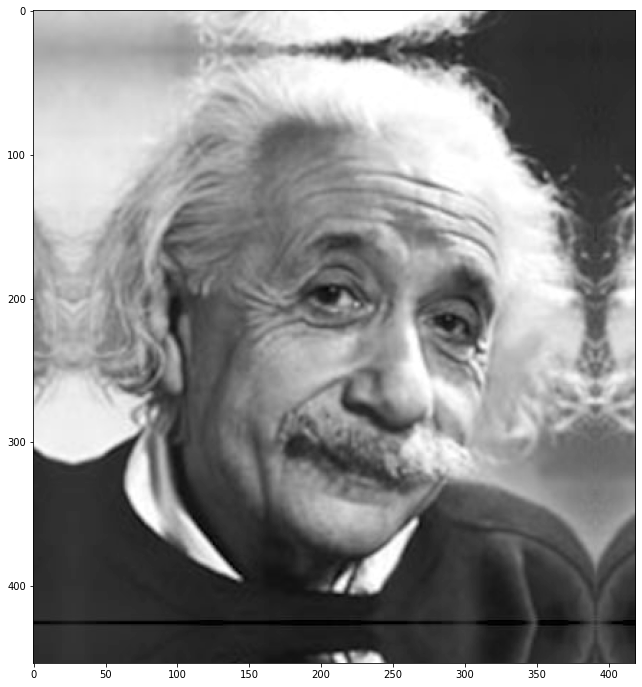

(398, 363, 1)

In [10]:
"""
 my_imfilter() which imitates the default behavior of the build in scipy.ndimage. 
 filter module and the MATLAB imfilter.m function. As specified in my_imfilter.py, 
 your filtering algorithm must 
 (1) support grayscale and color images 
 (2) support arbitrary shaped filters, as long as both dimensions are odd (e.g. 7x9 filters but not 4x5 filters) 
 (3) pad the input image with zeros or reflected image content 
 (4) return a filtered image which is the same resolution as the input image. (point 7.5)
"""

def my_imfilter(image, imfilter, pad='zero', verbose=False):
    if len(image.shape) !=3: # handling gray image with 2 dims to 3 dims
        image = np.expand_dims(image, -1)
        
    output_image = image.copy()
    
    if (imfilter.shape[0] % 2 == 0) or (imfilter.shape[1] % 2 == 0):
        print("Image filter should have shape with both dimensions in odd integers !")
        return None
    
    if not (pad == 'zero' or pad == 'reflect'):
        print("Padding specifications is not the ones recommeded, please use zero or reflect !")
        return None
    
    img_shape1, img_shape2, img_shape3 = image.shape[0], image.shape[1], image.shape[2]
    filter_shape1, filter_shape2 = imfilter.shape[0], imfilter.shape[1]
    padding_shape1, padding_shape2 = int((filter_shape1 - 1) / 2), int((filter_shape2 - 1) / 2)

    padded_image = np.zeros((img_shape1 + 2 * padding_shape1,
                             img_shape2 + 2 * padding_shape2,
                             img_shape3))
    padded_image[padding_shape1: img_shape1 + padding_shape1, 
                 padding_shape2: img_shape2 + padding_shape2,
                :] = image
    
    if pad != 'zero': # reflect case
        
        padded_image[:padding_shape1, padding_shape2:img_shape2+padding_shape2, :] = image[:padding_shape1, :, :][::-1, :, :]
        padded_image[padding_shape1+img_shape1:, padding_shape2:img_shape2+padding_shape2, :] = image[-padding_shape1:, :, :][::-1, :, :]
        
        padded_image[:, :padding_shape2, :] = padded_image[:, padding_shape2:2*padding_shape2, :][:, ::-1, :]
        padded_image[:, padding_shape2+img_shape2:, :] = padded_image[:, img_shape2:padding_shape2+img_shape2, :][:, ::-1, :]
        
        if verbose:     
            plt.figure(figsize=(12, 12))
            plt.imshow(padded_image, cmap='gray')
            plt.show()
        
        
    for channel in range( image.shape[2] ):
        for row in range( image.shape[0] ):
            for col in range( image.shape[1] ):
                output_image[row][col][channel] = sum(sum(np.multiply(imfilter, 
                                                                      padded_image[row:row + filter_shape1,
                                                                                   col:col + filter_shape2,
                                                                                   channel])))
                 
    return output_image


my_filter = np.ones((57, 57))
img11 = img1[:, :, 0]
img11 = my_imfilter(img11, my_filter, 'reflect', True)
img11.shape


# Actual my_imfilter function

In [11]:
"""
 my_imfilter() which imitates the default behavior of the build in scipy.ndimage. 
 filter module and the MATLAB imfilter.m function. As specified in my_imfilter.py, 
 your filtering algorithm must 
 (1) support grayscale and color images 
 (2) support arbitrary shaped filters, as long as both dimensions are odd (e.g. 7x9 filters but not 4x5 filters) 
 (3) pad the input image with zeros or reflected image content 
 (4) return a filtered image which is the same resolution as the input image. (point 7.5)
"""

def my_imfilter(image, imfilter, pad='zero', verbose=False):
    if len(image.shape) !=3: # handling gray image with 2 dims to 3 dims
        image = np.expand_dims(image, -1)
        
    output_image = image.copy()
    
    if (imfilter.shape[0] % 2 == 0) or (imfilter.shape[1] % 2 == 0):
        print("Image filter should have shape with both dimensions in odd integers !")
        return None
    
    if not (pad == 'zero' or pad == 'reflect'):
        print("Padding specifications is not the ones recommeded, please use zero or reflect !")
        return None
    
    img_shape1, img_shape2, img_shape3 = image.shape[0], image.shape[1], image.shape[2]
    filter_shape1, filter_shape2 = imfilter.shape[0], imfilter.shape[1]
    padding_shape1, padding_shape2 = int((filter_shape1 - 1) / 2), int((filter_shape2 - 1) / 2)

    padded_image = np.zeros((img_shape1 + 2 * padding_shape1,
                             img_shape2 + 2 * padding_shape2,
                             img_shape3))
    padded_image[padding_shape1: img_shape1 + padding_shape1, 
                 padding_shape2: img_shape2 + padding_shape2,
                :] = image
    
    if pad != 'zero': # reflect case
        
        padded_image[:padding_shape1, padding_shape2:img_shape2+padding_shape2, :] = image[:padding_shape1, :, :][::-1, :, :]
        padded_image[padding_shape1+img_shape1:, padding_shape2:img_shape2+padding_shape2, :] = image[-padding_shape1:, :, :][::-1, :, :]
        
        padded_image[:, :padding_shape2, :] = padded_image[:, padding_shape2:2*padding_shape2, :][:, ::-1, :]
        padded_image[:, padding_shape2+img_shape2:, :] = padded_image[:, img_shape2:padding_shape2+img_shape2, :][:, ::-1, :]
        
        if verbose:     
            plt.figure(figsize=(12, 12))
            plt.imshow(padded_image, cmap='gray')
            plt.show()
        
        
    for channel in range( image.shape[2] ):
        for row in range( image.shape[0] ):
            for col in range( image.shape[1] ):
                output_image[row][col][channel] = sum(sum(np.multiply(imfilter, 
                                                                      padded_image[row:row + filter_shape1,
                                                                                   col:col + filter_shape2,
                                                                                   channel])))
                 
    return output_image

# Testing-2

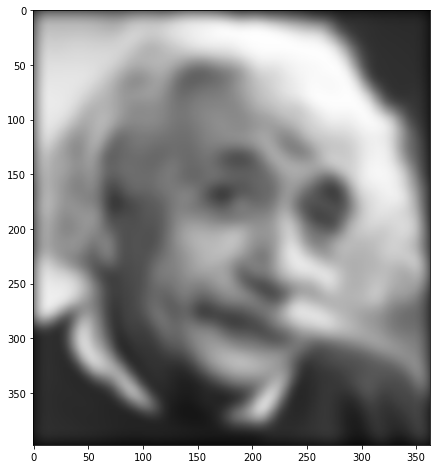

In [12]:
def gauss2D(shape=(3,3),sigma=0.5):
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

cutoff_frequency=7
gauss_filter = gauss2D(shape=(cutoff_frequency*4+1,cutoff_frequency*4+1), sigma = cutoff_frequency)

low_passed_img1 = my_imfilter(img1, gauss_filter)

plt.figure(figsize=(8, 8))
plt.imshow(low_passed_img1)
plt.show()

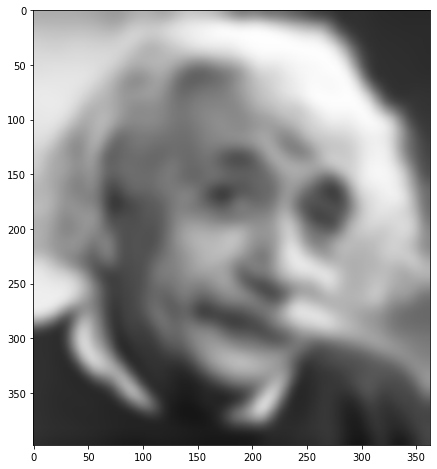

In [13]:
def gauss2D(shape=(3,3),sigma=0.5):
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

cutoff_frequency=7
gauss_filter = gauss2D(shape=(cutoff_frequency*4+1,cutoff_frequency*4+1), sigma = cutoff_frequency)

low_passed_img1 = my_imfilter(img1, gauss_filter, pad='reflect', verbose=False)

plt.figure(figsize=(8, 8))
plt.imshow(low_passed_img1)
plt.show()